In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Projects\Projects_Data\ML_project\online_payment_farud_detection\PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
type = df['type'].value_counts()
print(type)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [6]:
transaction_type = type.index

In [7]:
qunatity = type.values

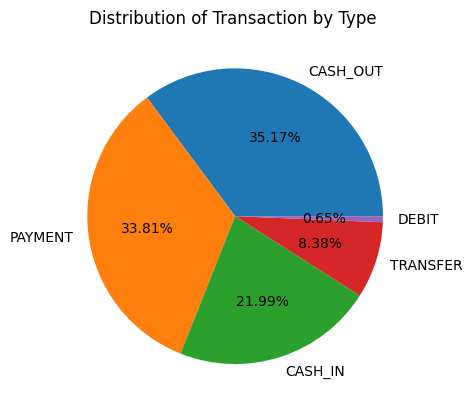

In [8]:
plt.pie(qunatity,labels=transaction_type,autopct='%1.2f%%')
plt.title('Distribution of Transaction by Type ')
plt.show()

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
print(df['type'].unique())
print(df['type'].value_counts())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [11]:
df['type'] = df['type'].map({'CASH_OUT':5,'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,4,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,5,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df['isFraud'] = df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,4,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,5,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [15]:
df1 = df.iloc[:,[1,2,4,5,9]]

In [16]:
X = df1.iloc[:,:-1]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scale = MinMaxScaler()

In [19]:
x_sc = scale.fit_transform(X)

In [20]:
x_sc.shape

(6362620, 4)

In [21]:
y = df1.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred_train = model.predict(x_train)

In [29]:
y_pred_test = model.predict(x_test)

In [30]:
print("accuracy score on traing:",accuracy_score(y_train,y_pred_train))
print("accuracy score on testing:",accuracy_score(y_test,y_pred_test))

accuracy score on traing: 0.9997224862893408
accuracy score on testing: 0.9995609775008828


In [43]:
payment_type = (input("Please enter the Payment tpye")).strip().upper()
payment_mapping = ({'CASH_OUT':5,'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})
payment_map_value = payment_mapping.get(payment_type,'you have enter wrong payment type')

amount = float(input('please Enter your current balance'))
oldbalance = float(input('please Enter your old Balance'))
newbalance = float(input('please Enter your newbalance'))

add_inputs = [payment_map_value,amount,oldbalance,newbalance]
scale_inputs = scale.transform([add_inputs])
result = model.predict(scale_inputs)
print('Result:',result)

Result: ['No Fraud']


In [34]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,4,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,5,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0
